# Latin Hypercube Sampling using UQpy

Author: Dimitris G. Giovanis,  
Date: May 13, 2020  
UQpy Version 3.0

In [1]:
#Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, 
# but also need to import the LHS class from UQpy.
from UQpy.SampleMethods import LHS
import numpy as np
import matplotlib.pyplot as plt
import time

UQpy: Running Latin Hypercube sampling...
UQpy: Achieved minimum correlation of  0.004685288818897407
Successful execution of LHS design.


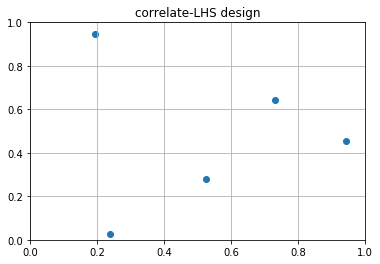

UQpy: Running Latin Hypercube sampling...
UQpy: Achieved maximum distance of  0.4395920987619376
Successful execution of LHS design.


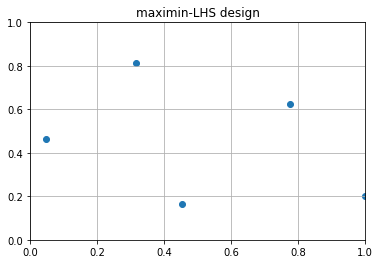

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.


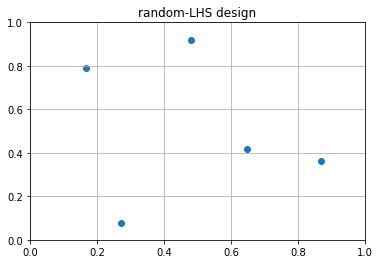

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.


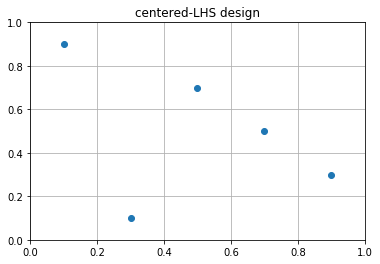

In [2]:
# Import the necessary Distributions from Distribution class to create the Distribution object
# We are going to run LHS for two uniform U(0,1) random variables.
from UQpy.Distributions import Uniform
dist1 = Uniform(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

x1a = LHS(dist_object=[dist1, dist2], criterion='correlate', nsamples=5, verbose=True)

fig, ax = plt.subplots()
plt.title('correlate-LHS design')
plt.scatter(x1a.samples[:, 0], x1a.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()


x1b = LHS(dist_object=[dist1, dist2], criterion='maximin', nsamples=5, verbose=True)


fig, ax = plt.subplots()
plt.title('maximin-LHS design')
plt.scatter(x1b.samples[:, 0], x1b.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

x1c = LHS(dist_object=[dist1, dist2], nsamples=5, verbose=True)

fig, ax = plt.subplots()
plt.title('random-LHS design')
plt.scatter(x1c.samples[:, 0], x1c.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()


x1d = LHS(dist_object=[dist1, dist2], criterion='centered', nsamples=5, verbose=True)


fig, ax = plt.subplots()
plt.title('centered-LHS design')
plt.scatter(x1d.samples[:, 0], x1d.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

In [3]:
from UQpy.Distributions import Uniform, Normal
dist1 = Normal(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

x2a = LHS(dist_object=[dist1, dist2], criterion='random', nsamples=5, verbose=True)
print('LHS design:', x2a.samples)


x2a.transform_u01()
print('Transformed samples:', x2a.samplesU01)

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.
LHS design: [[-0.28534707  0.63758072]
 [ 0.63436438  0.10706263]
 [ 0.11190219  0.4468521 ]
 [ 1.27026152  0.96987346]
 [-0.94700092  0.24210127]]
Transformed samples: [[0.38768913 0.        ]
 [0.73707847 0.63436438]
 [0.54454952 0.11190219]
 [0.89800425 1.        ]
 [0.17181916 0.        ]]


In [10]:
# Run LHS for a user-defined criterion and metric
#def distance(x):
#    return x+1

def criterion():
    nsamples = 5
    dimension = 2
    cut = np.linspace(0, 1, nsamples + 1)
    a = cut[:nsamples]
    b = cut[1:nsamples + 1]

    samples = np.zeros([nsamples, dimension])
    centers = (a + b) / 2

    for i in range(dimension):
        samples[:, i] = np.random.permutation(centers)
    return samples

dist1 = Uniform(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)
x1e = LHS(dist_object=[dist1, dist2], nsamples=5, criterion=criterion, verbose=True)
print(x1e.samples)

x1d = LHS(dist_object=[dist1, dist2], criterion='centered', nsamples=5, verbose=True)
print(x1d.samples)

UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.
[[0.1 0.3]
 [0.3 0.7]
 [0.7 0.9]
 [0.9 0.5]
 [0.5 0.1]]
UQpy: Running Latin Hypercube sampling...
Successful execution of LHS design.
[[0.9 0.3]
 [0.7 0.7]
 [0.3 0.5]
 [0.5 0.9]
 [0.1 0.1]]


In [11]:
# We are going to run LHS for a Joint distribution.
from UQpy.Distributions import Normal, Lognormal, JointInd
marginals = [Normal(loc=2., scale=2.), Lognormal(s=1., loc=0., scale=np.exp(5))]
dist = JointInd(marginals=marginals)

x2 = LHS(dist_object=dist, nsamples=5, criterion='maximin', verbose=True)
x2.transform_u01()
print(x2.samples)
print(x2.samplesU01)

UQpy: Running Latin Hypercube sampling...
UQpy: Achieved maximum distance of  0.43900518015822365
Successful execution of LHS design.
[[ 4.40978278e-01  3.23989630e+01]
 [ 2.34888738e+00  9.48435747e+01]
 [ 5.25059146e+00  2.25244684e+02]
 [ 2.68144847e+00  1.04006480e+03]
 [-1.29478888e+00  1.60789090e+02]]
[[0.21783942 0.06402038]
 [0.56924161 0.32715922]
 [0.94795022 0.66172929]
 [0.6333444  0.97423493]
 [0.0497385  0.53191856]]
